In [1]:
import numpy as np
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
def read_all_files(directory):
    for path, directories, files in os.walk(directory):
        data = []
        for file in files:
            with open(path+'/'+file) as f:
                data = data + [json.load(f)]
        result = {key: np.reshape([res[key] for res in data], -1).tolist() for key in data[0].keys()}    
        return result

In [3]:
def plot_res(result_df):
    test = pd.DataFrame(result_df.unstack()).reset_index()
    test.columns = ['method', 'metric', 'perf']
    sns.barplot(data=test, x='metric', y='perf', hue='method')
    plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
    plt.show()

In [8]:
def evaluate_experiment(experiment, old = True):
    # domain adaptation 
    res = read_all_files(f'record/{experiment}')
    # naive transfer 
    res_source_only = read_all_files(f'record/{experiment}/source_only')
    if old:
        index = ['AUC', 'Matthew', 'F1', 'FBeta', 'Accuracy']
    else:
        index = ['AUC', 'Matthew', 'F1', 'FBeta', 'Accuracy', 'Precision', 'Recall']
    method_names= ['DA', 'Naive Transfer']
    method_file_dict = {'DA':res,  'Naive Transfer': res_source_only}
    result_df= pd.DataFrame(index = index, columns=method_names)
    for metric in index:
        for method in method_names:
            result_df.loc[metric, method] = np.mean(method_file_dict[method][metric])
    plot_res(result_df)
    return result_df

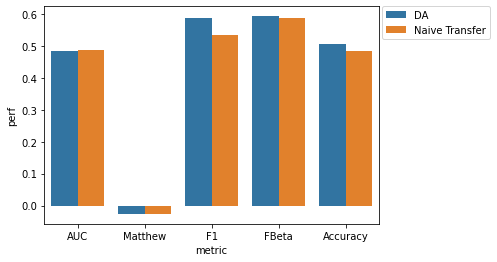

,DA,Naive Transfer
AUC,0.486626,0.487274
Matthew,-0.0264289,-0.025225
F1,0.58731,0.534942
FBeta,0.594355,0.589635
Accuracy,0.507027,0.486595


In [9]:
# batch size 128
evaluate_experiment("2021-06-29_09:57")

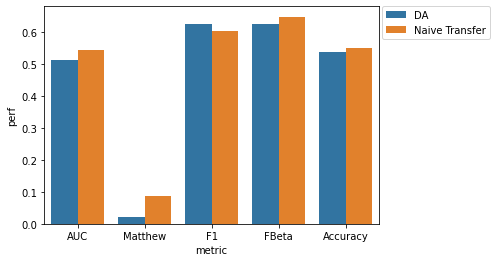

,DA,Naive Transfer
AUC,0.510489,0.544505
Matthew,0.0216602,0.0877123
F1,0.623038,0.60141
FBeta,0.623619,0.646991
Accuracy,0.537057,0.549431


In [10]:
# batch size 62
evaluate_experiment("2021-06-29_15:30")

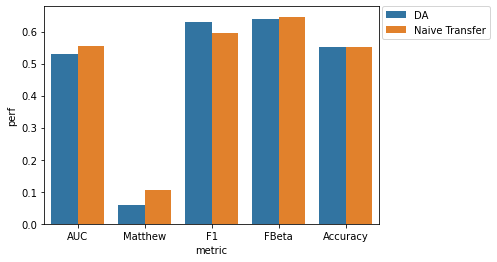

,DA,Naive Transfer
AUC,0.529817,0.553236
Matthew,0.0594246,0.105345
F1,0.629584,0.594322
FBeta,0.637958,0.646168
Accuracy,0.550769,0.55097


In [11]:
# batch size 32
evaluate_experiment("2021-06-29_12:25")

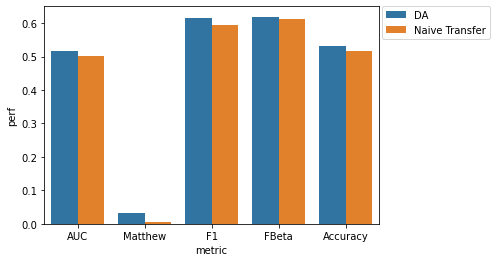

,DA,Naive Transfer
AUC,0.515921,0.502316
Matthew,0.0311695,0.00555663
F1,0.615415,0.593045
FBeta,0.619207,0.611584
Accuracy,0.533028,0.516129


In [12]:
#batch size 64 with adding the batch norm and cross validation
evaluate_experiment('2021-07-07_06:50')

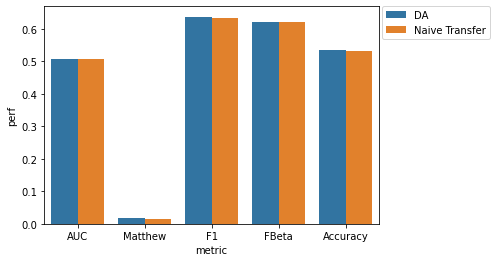

,DA,Naive Transfer
AUC,0.507885,0.506516
Matthew,0.0176494,0.014889
F1,0.636792,0.633953
FBeta,0.620766,0.619704
Accuracy,0.53522,0.532843


In [13]:
#batch size 128 with adding the batch norm and cross validation
evaluate_experiment('2021-07-07_12:16:31')

In [14]:
evaluate_experiment("2021-08-31_17:00", old=False)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


IndexError: list index out of range